### Problem Statement:

This case is about a bank which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

### Data Description:								
								
* ID	Customer ID							
* Age	Customer's age in completed years							
* Experience	#years of professional experience							
* Income	    Annual income of the customer($000)							

* ZIP Code	Home Address ZIP code
* Family	Family size of the customer							
* CCAvg	    Avg. spending on credit cards per month($000)

* Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
* Mortgage	Value of house mortgage if any($000)							
* Personal Loan	Did this customer accept the personal loan offered in the last campaign?   (Target)							
* Securities Account	Does the customer have a securities account with the bank?							
* CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
* Online	Does the customer use internet banking facilities?							
* CreditCard	Does the customer use a credit card issued by UniversalBank?	

### Load the required libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [10]:
data = pd.read_excel('Bank_Personal_Loan.xlsx',sheet_name='Data')

In [11]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Understanding the dataset

In [12]:
data.shape

(5000, 14)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [14]:
# 'Personal Loan' attribute is the target.

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [16]:
# Family, Education,Personal Loan, Securities Account, CD Account, Online, CreditCard are categorical columns.
# They are already encoded in an ordinal manner.
# So data type conversion is not needed.

In [17]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [18]:
# there are no missing values.

### Data Cleaning

#### Remove insignificant variable

In [19]:
data['ID'].nunique()

5000

In [20]:
data['ZIP Code'].nunique()

467

In [21]:
# saving the data in df after removing insignificant columns:
df = data.drop(['ID','ZIP Code'], axis =1)

## Univariate Analysis

### Analysing the target variable

In [22]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [23]:
# it is categorical column

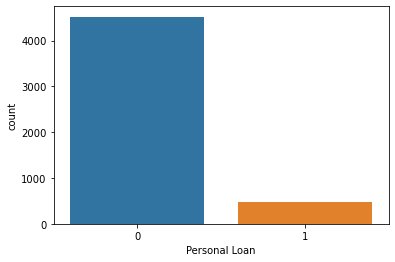

In [24]:
sns.countplot(df['Personal Loan']);

In [25]:
df['Personal Loan'].describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal Loan, dtype: float64

### Analysing the independant variables

#### 1. Age - Customer's age in completed years	

In [26]:
# continuous column

In [27]:
df['Age'].nunique() 

45

In [28]:
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [29]:
df['Age'].skew()

-0.02934068151284029

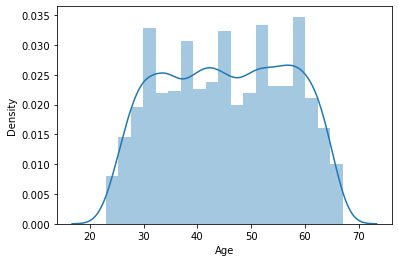

In [30]:
sns.distplot(df['Age']);

In [31]:
df['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [32]:
# minimum age is 23 yrs and max is 67 yrs with a mean of 45yrs.

In [33]:
from scipy.stats import shapiro

In [34]:
shapiro(df['Age'])

ShapiroResult(statistic=0.9618571400642395, pvalue=2.251294612491604e-34)

In [35]:
# pval is less than 0.05, Data is not normally distributed

#### 2.Experience - #years of professional experience

In [36]:
# continuous column

In [37]:
df['Experience'].nunique()

47

In [38]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [39]:
# experience cannot be in negative values

In [40]:
df['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [41]:
# assuming that negative experience records are data entry error. so changing them to positive
df['Experience'].replace({-1: 1, -2:2, -3:3}, inplace=True)

In [42]:
df[df['Experience'] <0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [43]:
df['Experience'].skew()

-0.010037994995886824

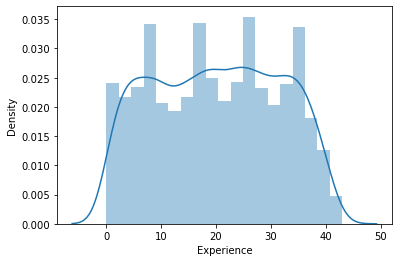

In [44]:
sns.distplot(df['Experience']);

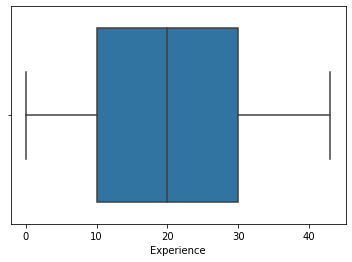

In [45]:
sns.boxplot(df['Experience']);

In [46]:
shapiro(df['Experience'])

ShapiroResult(statistic=0.961359977722168, pvalue=1.4838707148754996e-34)

In [47]:
# pval is less than 0.05, Data is not normally distributed

#### 3.Income - Annual income of the customer($000)

In [48]:
# continuous column

In [49]:
df['Income'].nunique()

162

In [50]:
df['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [51]:
df['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [52]:
# coverting all income values to actual figures:
df['Income'] = df['Income'].apply(lambda x: x*1000)

In [53]:
df['Income'].skew()

0.8413386072610816

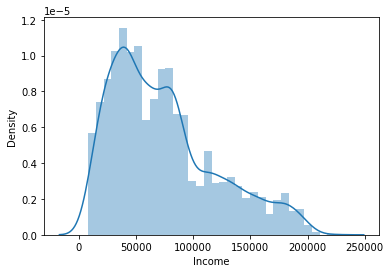

In [54]:
sns.distplot(df['Income']);

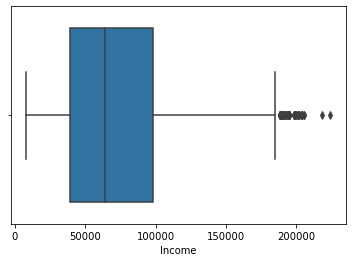

In [55]:
sns.boxplot(df['Income']);

In [56]:
# outliers are present

In [57]:
shapiro(df['Income'])

ShapiroResult(statistic=0.9282413721084595, pvalue=8.688050478813866e-44)

In [58]:
# pval is less than 0.05, Data is not normally distributed

#### 4.Family - Family size of the customer	

In [59]:
# categorical column

In [60]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

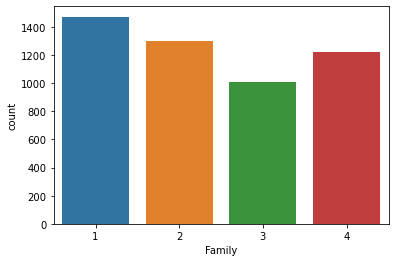

In [61]:
sns.countplot(df['Family']);

In [62]:
df['Family'].describe()

count    5000.000000
mean        2.396400
std         1.147663
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

In [63]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

#### 5.CCAvg - Avg. spending on credit cards per month($000)

In [64]:
# continuous column

In [65]:
df['CCAvg'].nunique()

108

In [66]:
df['CCAvg'].unique()

array([ 1.6       ,  1.5       ,  1.        ,  2.7       ,  0.4       ,
        0.3       ,  0.6       ,  8.9       ,  2.4       ,  0.1       ,
        3.8       ,  2.5       ,  2.        ,  4.7       ,  8.1       ,
        0.5       ,  0.9       ,  1.2       ,  0.7       ,  3.9       ,
        0.2       ,  2.2       ,  3.3       ,  1.8       ,  2.9       ,
        1.4       ,  5.        ,  2.3       ,  1.1       ,  5.7       ,
        4.5       ,  2.1       ,  8.        ,  1.7       ,  0.        ,
        2.8       ,  3.5       ,  4.        ,  2.6       ,  1.3       ,
        5.6       ,  5.2       ,  3.        ,  4.6       ,  3.6       ,
        7.2       ,  1.75      ,  7.4       ,  2.66666667,  7.5       ,
        6.5       ,  7.8       ,  7.9       ,  4.1       ,  1.9       ,
        4.3       ,  6.8       ,  5.1       ,  3.1       ,  0.8       ,
        3.7       ,  6.2       ,  0.75      ,  2.33333333,  4.9       ,
        0.66666667,  3.2       ,  5.5       ,  6.9       ,  4.33

In [67]:
df['CCAvg'].describe()

count    5000.000000
mean        1.937913
std         1.747666
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [68]:
# coverting all income values to actual figures:
df['CCAvg'] = df['CCAvg'].apply(lambda x: x*1000)

In [69]:
df['CCAvg'].skew()

1.5984566180520416

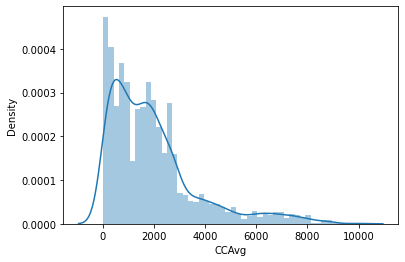

In [70]:
sns.distplot(df['CCAvg']);

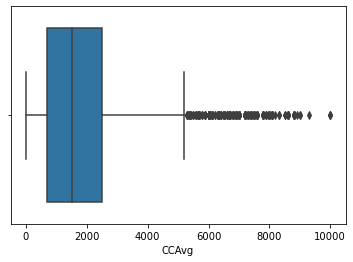

In [71]:
sns.boxplot(df['CCAvg']);

In [72]:
# large number of outliers are present

In [73]:
shapiro(df['CCAvg'])

ShapiroResult(statistic=0.8472586870193481, pvalue=0.0)

In [74]:
# pval is less than 0.05, Data is not normally distributed

#### 6.Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

In [75]:
# categorical column

In [76]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

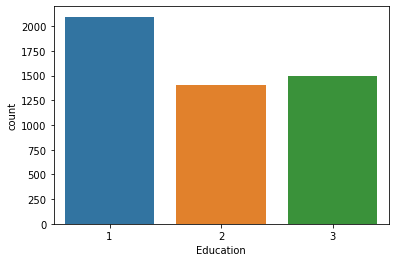

In [77]:
sns.countplot(df['Education']);

In [78]:
df['Education'].describe()

count    5000.000000
mean        1.881000
std         0.839869
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Education, dtype: float64

#### 7.Mortgage - Value of house mortgage if any($000)

In [79]:
# continuous column

In [80]:
df['Mortgage'].nunique()

347

In [81]:
df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [82]:
df['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [83]:
# coverting all income values to actual figures:
df['Mortgage'] = df['Mortgage'].apply(lambda x: x*1000)

In [84]:
df['Mortgage'].skew()

2.104002319107944

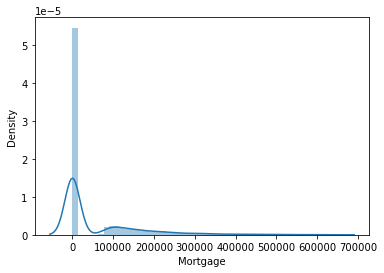

In [85]:
sns.distplot(df['Mortgage']);

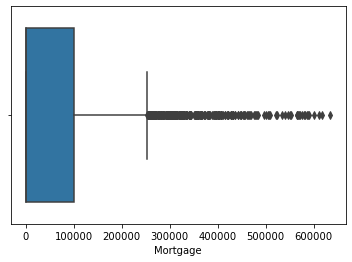

In [86]:
sns.boxplot(df['Mortgage']);

In [87]:
# large number of outliers are present

In [88]:
shapiro(df['Mortgage'])

ShapiroResult(statistic=0.6281886696815491, pvalue=0.0)

In [89]:
# pval is less than 0.05, Data is not normally distributed

#### 8.Personal Loan - Did this customer accept the personal loan offered in the last campaign?

In [90]:
# categorical column

In [91]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

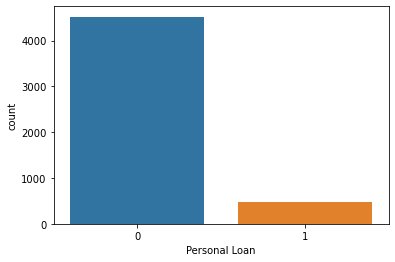

In [92]:
sns.countplot(df['Personal Loan']);

In [93]:
df['Personal Loan'].describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal Loan, dtype: float64

#### 9.Securities Account - Does the customer have a securities account with the bank?

In [94]:
# categorical column

In [95]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

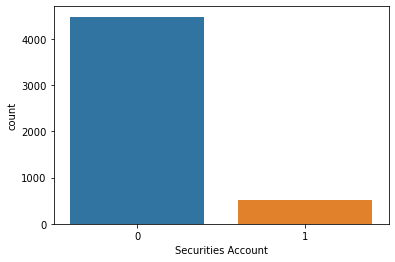

In [96]:
sns.countplot(df['Securities Account']);

In [97]:
df['Securities Account'].describe()

count    5000.000000
mean        0.104400
std         0.305809
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Securities Account, dtype: float64

#### 10.CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

In [98]:
# categorical column

In [99]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

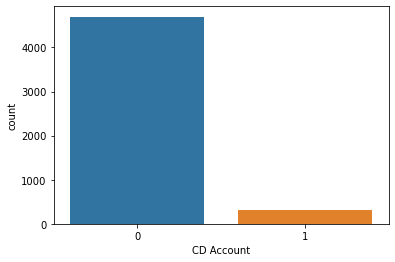

In [100]:
sns.countplot(df['CD Account']);

In [101]:
df['CD Account'].describe()

count    5000.00000
mean        0.06040
std         0.23825
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: CD Account, dtype: float64

#### 11.Online - Does the customer use internet banking facilities?

In [102]:
# categorical column

In [103]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

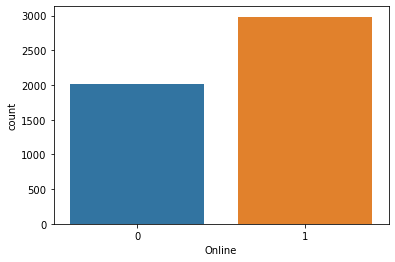

In [104]:
sns.countplot(df['Online']);

In [105]:
df['Online'].describe()

count    5000.000000
mean        0.596800
std         0.490589
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Online, dtype: float64

#### 12.CreditCard - Does the customer use a credit card issued by UniversalBank?	

In [106]:
# categorical column

In [107]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

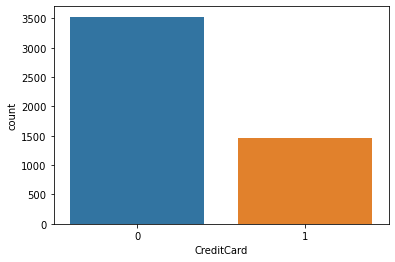

In [108]:
sns.countplot(df['CreditCard']);

In [109]:
df['CreditCard'].describe()

count    5000.000000
mean        0.294000
std         0.455637
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CreditCard, dtype: float64

## Bivariate Analysis

In [110]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

#### 1.Age vs Personal Loan

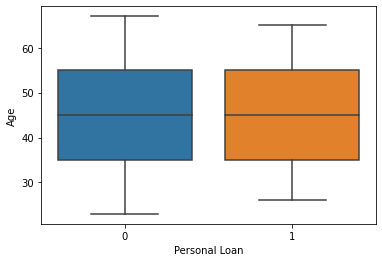

In [111]:
sns.boxplot(df['Personal Loan'], df['Age']);

In [112]:
# mean age is same for both
# people aged 35 yrs to 55 yrs have taken personal loan.

#### 2.Income vs Personal Loan

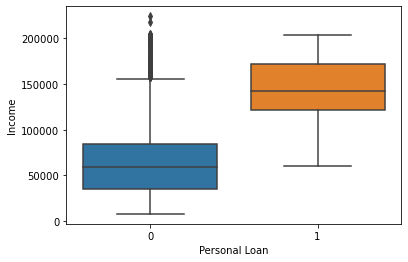

In [113]:
sns.boxplot(df['Personal Loan'], df['Income']);

In [114]:
# people having income above 100000 and below 175000 have taken personal loan.
# people who has not taken loan have income in the range 75000 and 80000.

#### 3.Family vs Personal Loan

Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134


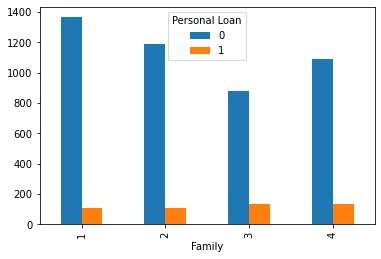

In [115]:
pd.crosstab(df['Family'],df['Personal Loan']).plot(kind='bar')
print(pd.crosstab(df['Family'],df['Personal Loan']))

In [116]:
# most loans are taken by people having family size of 3 and 4.

#### 4.Education vs Personal Loan

Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205


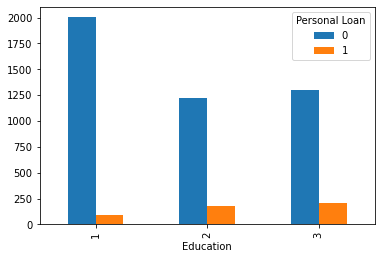

In [117]:
pd.crosstab(df['Education'],df['Personal Loan']).plot(kind='bar')
print(pd.crosstab(df['Education'],df['Personal Loan']))

In [118]:
# people with professional qualification have taken highest loans.

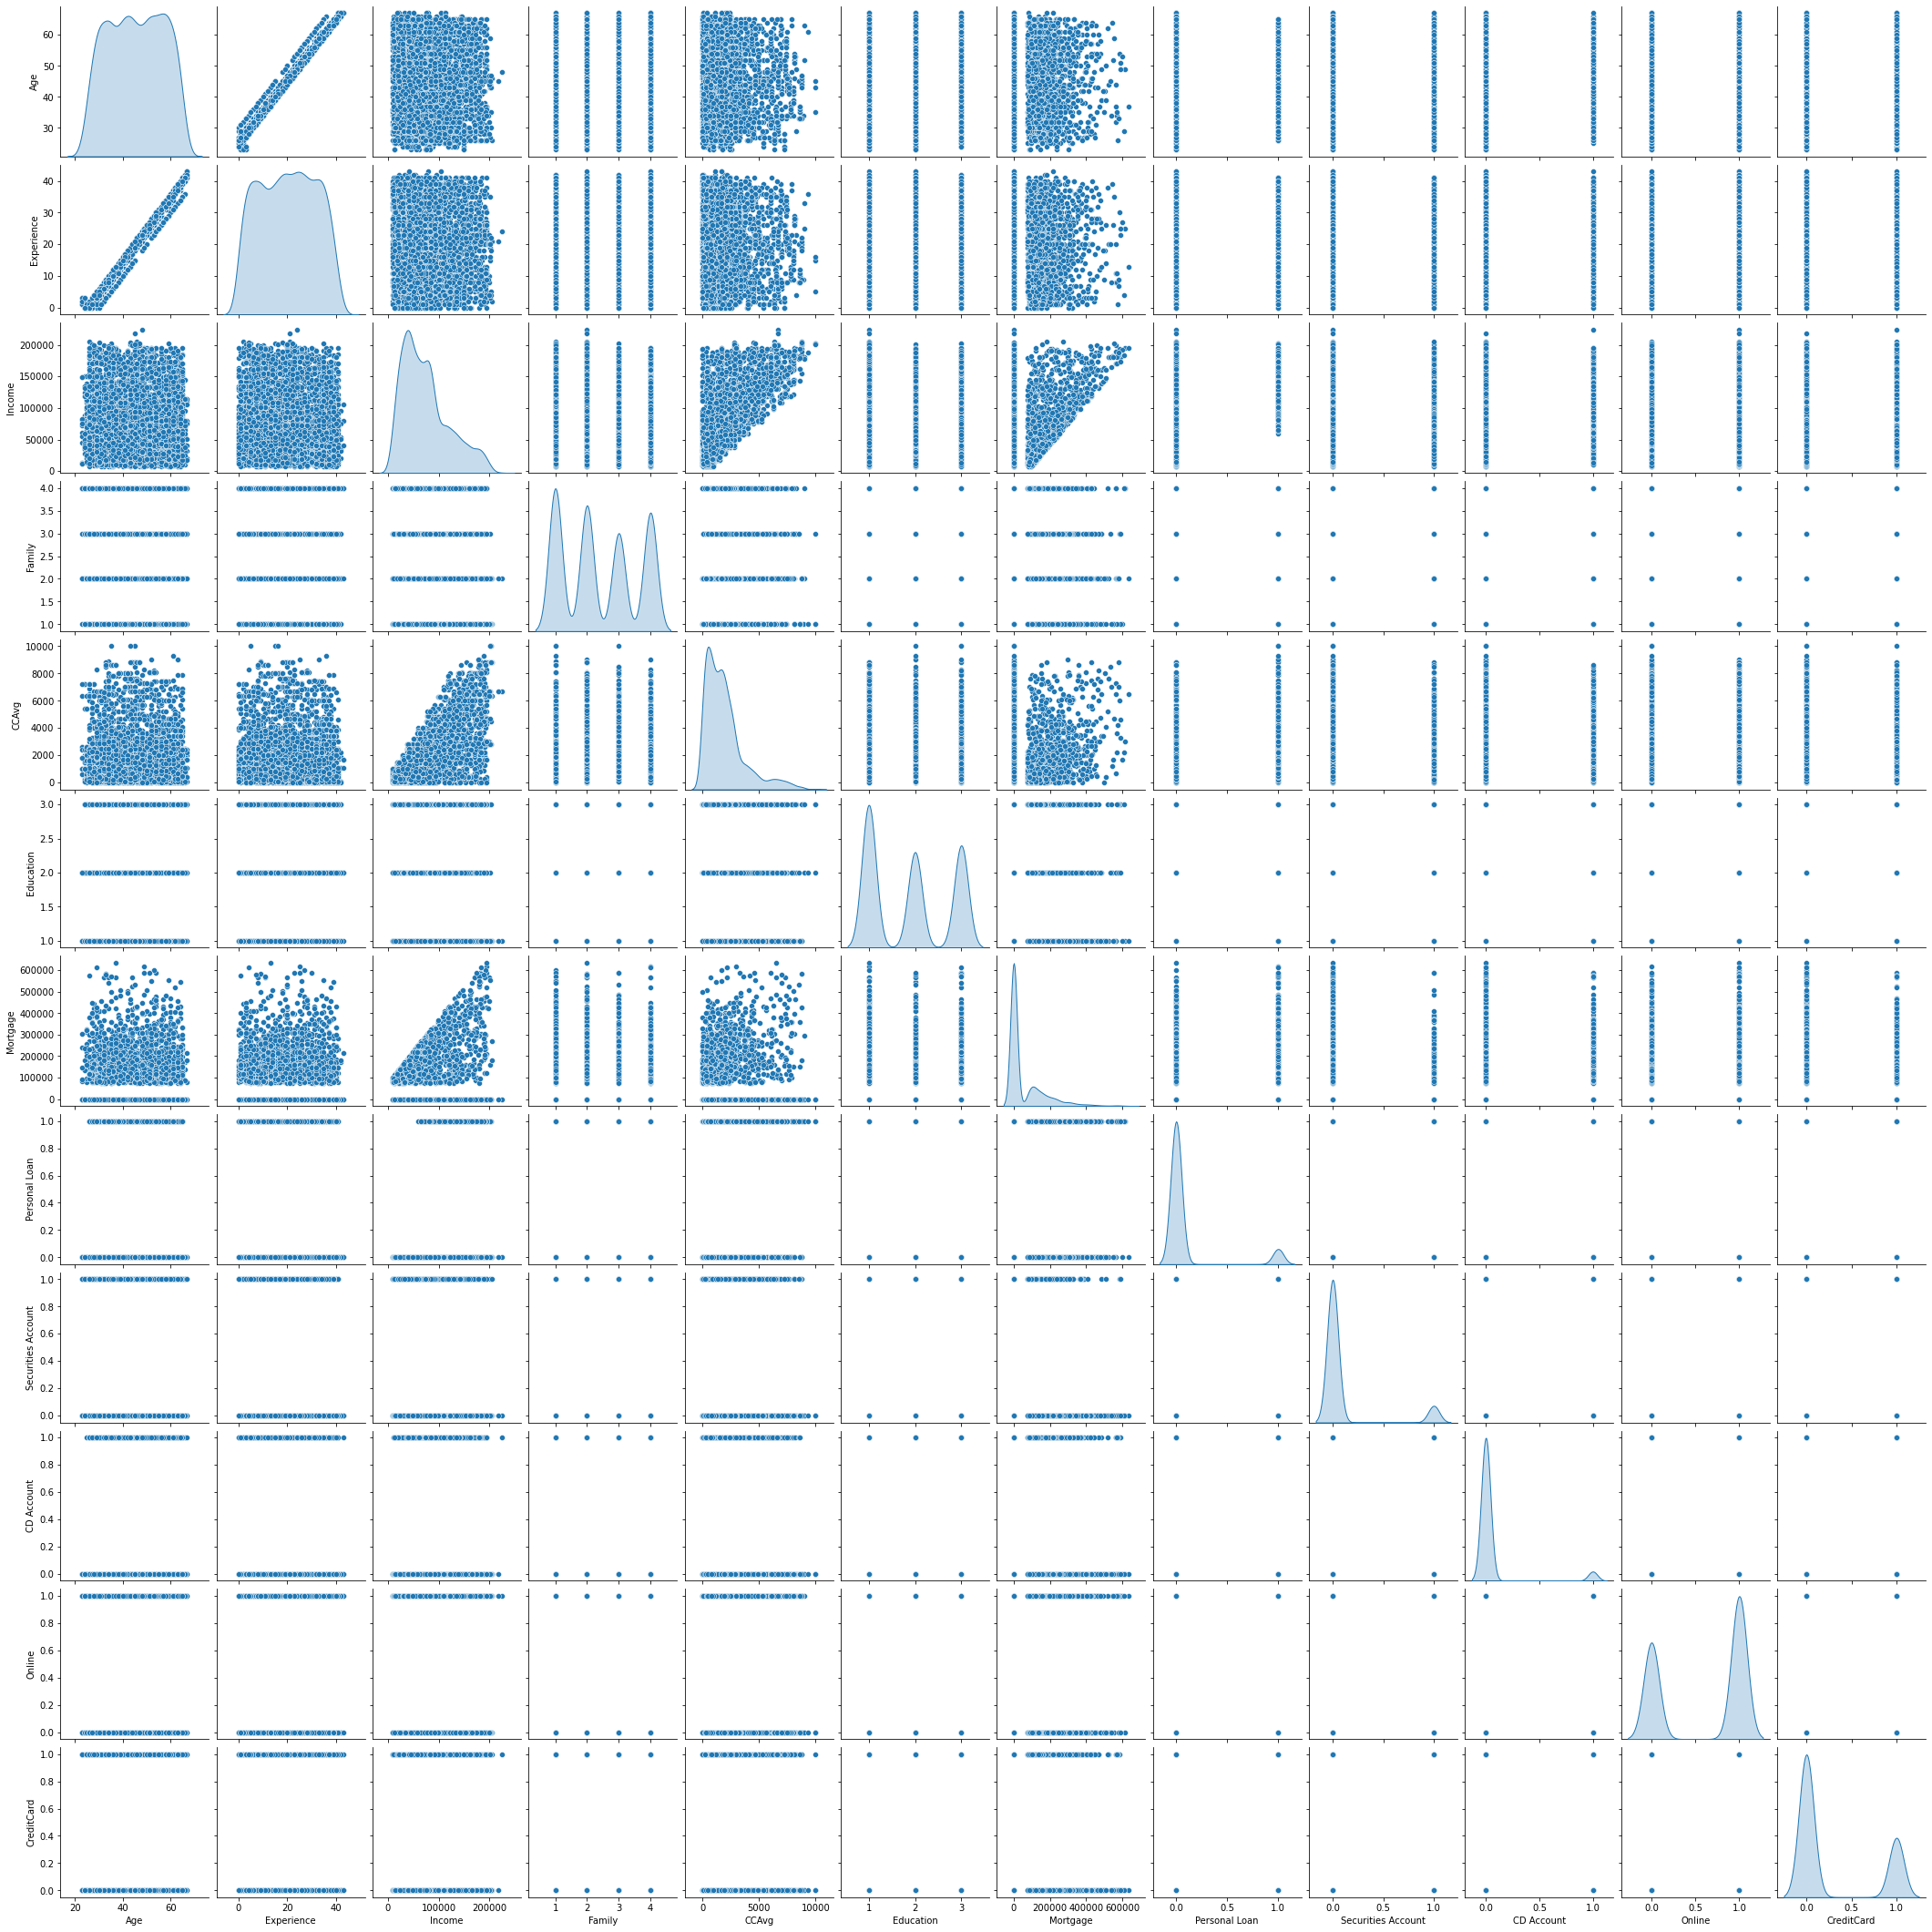

In [119]:
sns.pairplot(df, diag_kind='kde')

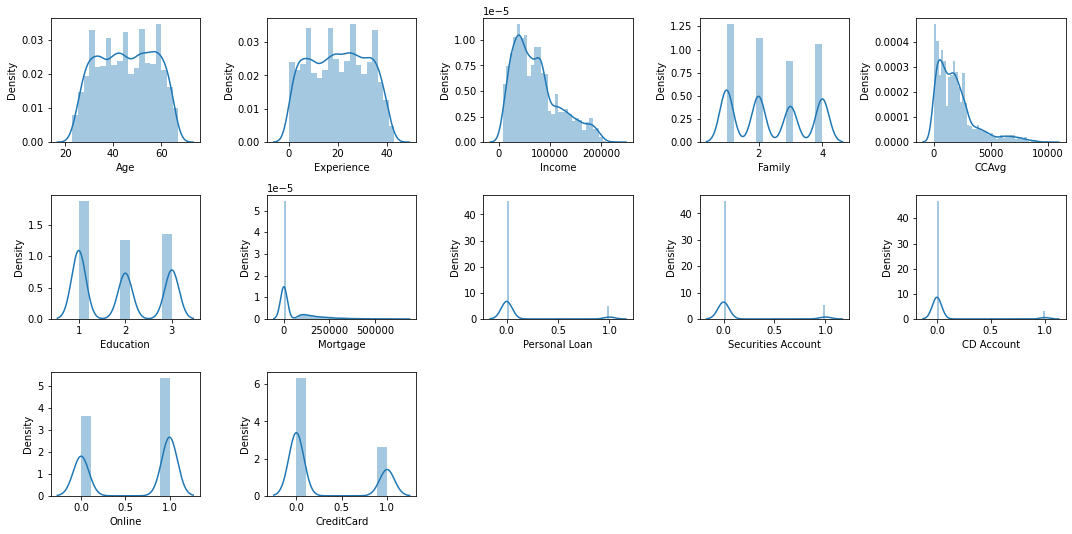

In [120]:
# distribution of attributes:
plt.figure(figsize=(15,12))
j = 1

for i in df.columns:
    plt.subplot(5,5,j)
    sns.distplot(df[i])
    j+=1

plt.tight_layout()
plt.show()

<AxesSubplot:>

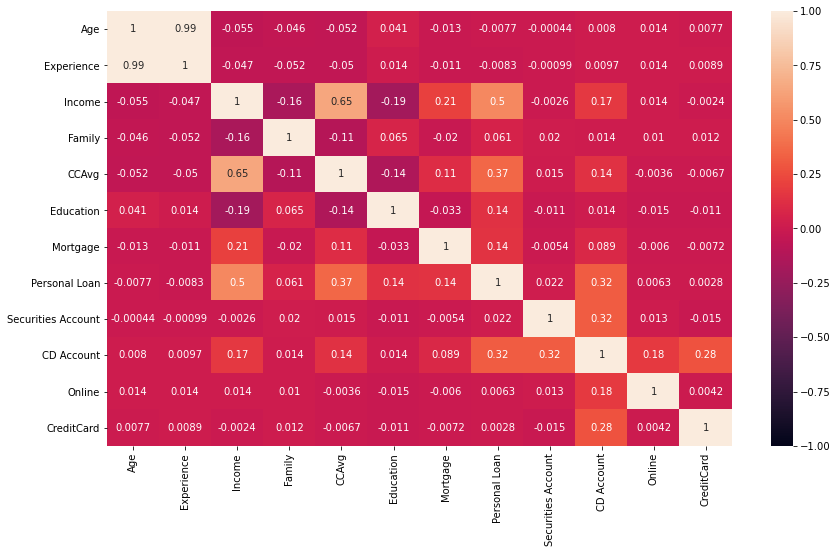

In [121]:
# correlation matrix:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, vmin = -1, vmax = 1)

### Treating Imbalance

In [122]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [123]:
from imblearn.over_sampling import SMOTE

In [124]:
smote = SMOTE(random_state=11, sampling_strategy=.3)
X,y = smote.fit_resample(X,y)

### Data Scaling

In [125]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [126]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_df = pd.DataFrame(ss.fit_transform(X), columns =X.columns)

In [127]:
x_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.805857,-1.706218,-0.696734,1.452172,-0.337986,-1.081894,-0.554621,3.159617,-0.256225,-1.14009,-0.593336
1,-0.022100,-0.093657,-0.992167,0.558387,-0.390203,-1.081894,-0.554621,3.159617,-0.256225,-1.14009,-0.593336
2,-0.557227,-0.452004,-1.445165,-1.229182,-0.651284,-1.081894,-0.554621,-0.316494,-0.256225,-1.14009,-0.593336
3,-0.913979,-0.989525,0.307740,-1.229182,0.236393,0.145130,-0.554621,-0.316494,-0.256225,-1.14009,-0.593336
4,-0.913979,-1.079111,-0.775516,1.452172,-0.651284,0.145130,-0.554621,-0.316494,-0.256225,-1.14009,1.685385


In [128]:
x_df.shape

(5876, 11)

### Train test split

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y, test_size=0.20, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4700, 11)
(4700,)
(1176, 11)
(1176,)


### Model Building

#### Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [132]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train,y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [133]:
print(classification_report(y_train,y_train_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3596
           1       1.00      1.00      1.00      1104

    accuracy                           1.00      4700
   macro avg       1.00      1.00      1.00      4700
weighted avg       1.00      1.00      1.00      4700



In [134]:
print(classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       924
           1       0.93      0.94      0.93       252

    accuracy                           0.97      1176
   macro avg       0.95      0.96      0.96      1176
weighted avg       0.97      0.97      0.97      1176



In [135]:
#  model is not overfitting as the accuracy is almost near.

In [136]:
from sklearn.model_selection import cross_val_score

In [137]:
dt = DecisionTreeClassifier()
score = cross_val_score(dt, X_train, y_train, cv=5, scoring='f1_weighted')

print('scores', score)
print('bias error: ', (1-np.mean(score))*100)
print('variance error: ', (np.std(score)/np.mean(score))*100)

scores [0.96048018 0.97562607 0.95744681 0.9715966  0.96371479]
bias error:  3.4227108996684685
variance error:  0.7061868312422757


In [138]:
# both bias error and variance error are less. so the model is generalised and good model

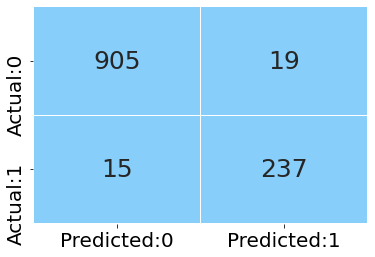

In [139]:
from matplotlib.colors import ListedColormap

cm = confusion_matrix(y_test,y_test_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [140]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

True Negatives:  905
False Positives:  19
False Negatives:  15
True Positives:  237
Accuracy 97.11%:


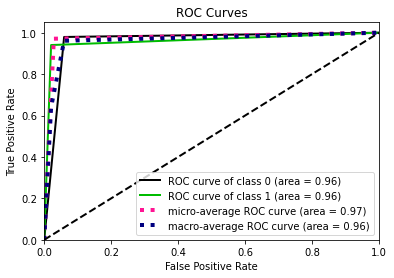

In [141]:
import scikitplot as skplt 
y_test_pred_proba = dt_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_test_pred_proba)
plt.show()

In [142]:
roc_auc_score(y_test, y_test_pred_proba[:,1])

0.9599567099567099

#### Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train,y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [145]:
print(classification_report(y_train,y_train_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3596
           1       1.00      1.00      1.00      1104

    accuracy                           1.00      4700
   macro avg       1.00      1.00      1.00      4700
weighted avg       1.00      1.00      1.00      4700



In [146]:
print(classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       924
           1       0.96      0.95      0.96       252

    accuracy                           0.98      1176
   macro avg       0.97      0.97      0.97      1176
weighted avg       0.98      0.98      0.98      1176



In [147]:
#  model is not overfitting as the accuracy is almost near.

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
rf = RandomForestClassifier()
score = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_weighted')

print('scores', score)
print('bias error: ', (1-np.mean(score))*100)
print('variance error: ', (np.std(score)/np.mean(score))*100)

scores [0.96870898 0.97434545 0.9752708  0.98719346 0.97957153]
bias error:  2.2981958230321786
variance error:  0.629770809704269


In [150]:
# both bias error and variance error are less. so the model is generalised and good model

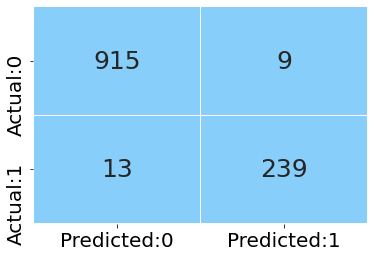

In [151]:
from matplotlib.colors import ListedColormap

cm = confusion_matrix(y_test,y_test_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#### Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
lr = LogisticRegression()
logreg_model = lr.fit(X_train,y_train)

y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

In [154]:
print(classification_report(y_train,y_train_pred ))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3596
           1       0.82      0.74      0.78      1104

    accuracy                           0.90      4700
   macro avg       0.87      0.85      0.86      4700
weighted avg       0.90      0.90      0.90      4700



In [155]:
print(classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       924
           1       0.83      0.77      0.80       252

    accuracy                           0.92      1176
   macro avg       0.88      0.86      0.87      1176
weighted avg       0.92      0.92      0.92      1176



In [156]:
y_test_pred_prob = logreg_model.predict(X_test)

In [157]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_test_pred_prob]

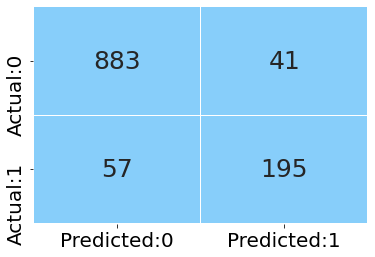

In [158]:
from matplotlib.colors import ListedColormap

cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [159]:
# logistic regression is not best for this dataset.